# ▼ポケモンデータによるクラスタリング  
名前、タイプ、種族値がまとまってる

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('./Pokemon.csv')
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [7]:
df.head(160)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True


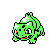

In [8]:
from PIL import Image
filename_001 = ("./data/001_kin.png")
im_001 = Image.open(filename_001)
im_001

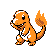

In [9]:
filename_004 = ("./data/004_kin.png")
im_004 = Image.open(filename_004)
im_004

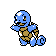

In [10]:
filename_007 = ("./data/007_kin.png")
im_007 = Image.open(filename_007)
im_007

▼スキル（種族値）を可視化

In [44]:
#pd.meltでデータをid_varsとvariable(value)に分ける
#箱ひげ図で可視化しやすいようにデータフレームの再構築
df_boxplot = pd.melt(df, id_vars = ["#", "Name", "Type 1", "Type 2", "Generation"], 
                     value_vars = ["HP", "Attack", "Defense", "Sp. Atk","Sp. Def", "Speed"])

df_boxplot

,#,Name,Type 1,Type 2,Generation,variable,value
0,1,Bulbasaur,Grass,Poison,1,HP,45
1,2,Ivysaur,Grass,Poison,1,HP,60
2,3,Venusaur,Grass,Poison,1,HP,80
3,3,VenusaurMega Venusaur,Grass,Poison,1,HP,80
4,4,Charmander,Fire,NaN,1,HP,39
...,...,...,...,...,...,...,...
4795,719,Diancie,Rock,Fairy,6,Speed,50
4796,719,DiancieMega Diancie,Rock,Fairy,6,Speed,110
4797,720,HoopaHoopa Confined,Psychic,Ghost,6,Speed,70
4798,720,HoopaHoopa Unbound,Psychic,Dark,6,Speed,80


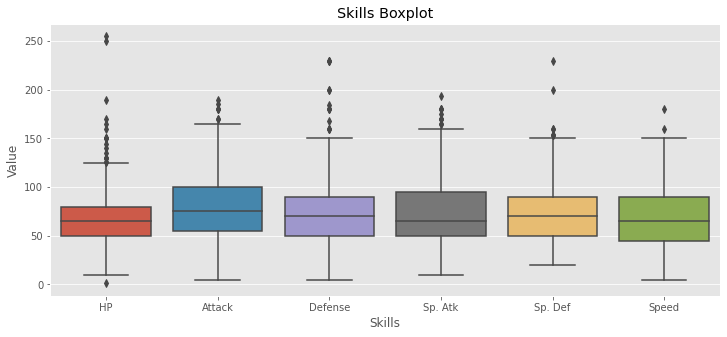

In [9]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x="variable", y="value", data=df_boxplot)
plt.title("Skills Boxplot")
plt.xlabel("Skills")
plt.ylabel("Value")
plt.show()

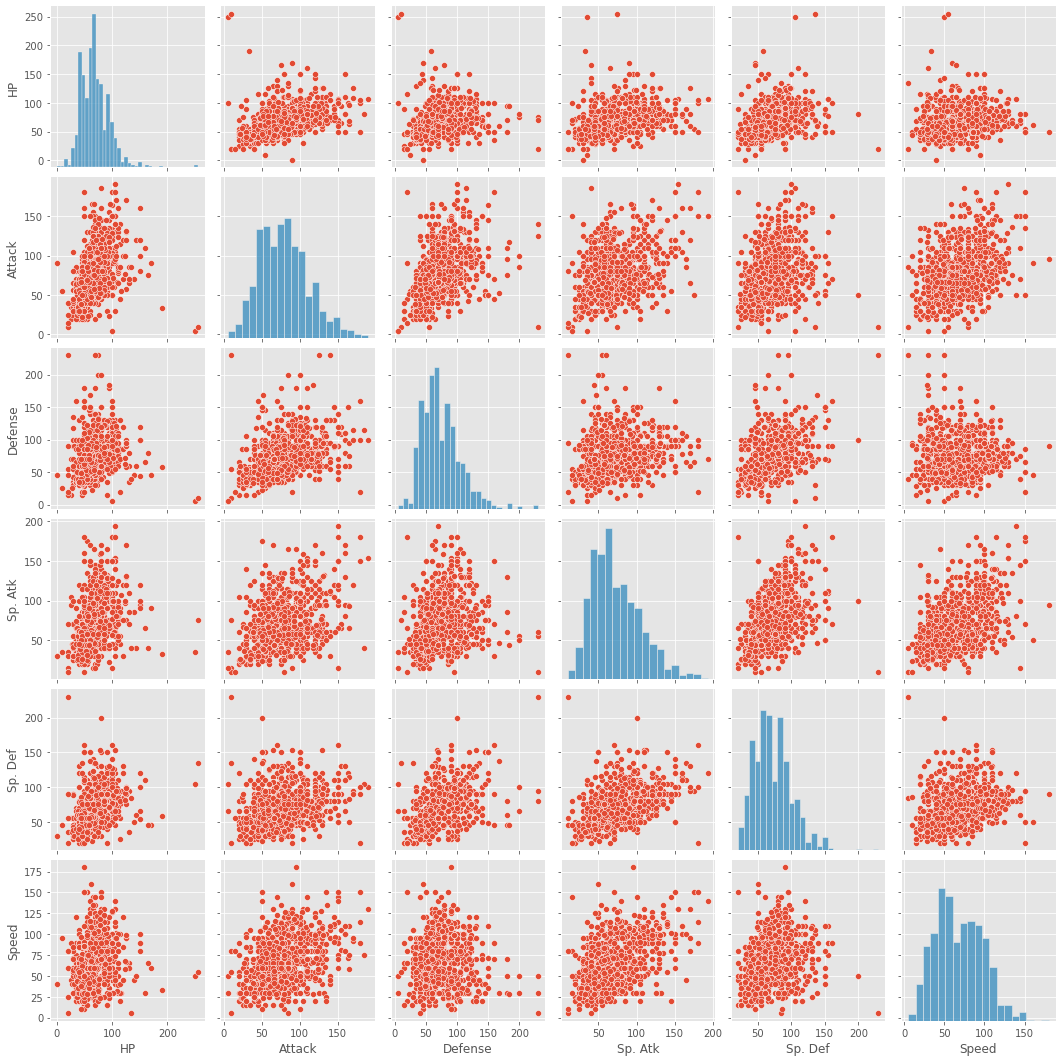

In [10]:
sns.pairplot(df[['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']])

▼各スキル（種族値）同士の相関をみる

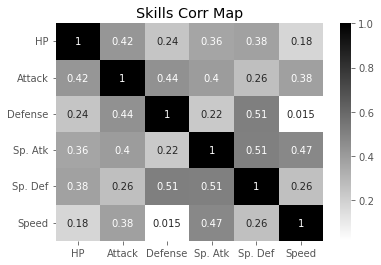

In [11]:
skills = [ 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']

sns.heatmap(df[skills].corr(),
            cmap="binary",
            annot=True)
plt.title("Skills Corr Map")
plt.show()

# ▼エルボー（肘）法

▼k-means法はデータ距離を扱うから標準化しておく

In [12]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
stdscale = scale.fit_transform(df[skills])

In [45]:
n_max_clusters = 15
score = []

for cluster in range(1,n_max_clusters):
    kmeans_f = KMeans(n_clusters = cluster,
                      init="k-means++",
                      random_state=10)
    kmeans_f.fit(stdscale)
    score.append(kmeans_f.inertia_)

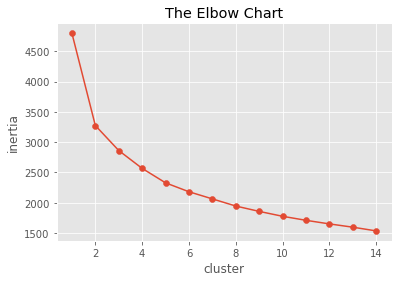

In [14]:
plt.plot(range(1,n_max_clusters), score)
plt.scatter(range(1,n_max_clusters), score)
plt.title('The Elbow Chart')
plt.xlabel('cluster')
plt.ylabel('inertia')
plt.show()

クラスタ数5にうっすら肘の面影を感じなくもないので、クラスタ数5で分類していく

# ▼k-means法でクラスタリング！

In [15]:
k_means = KMeans(n_clusters = 5,
                init="k-means++", #セントロイドの初期設定をk-means＋＋法で選択、設定しなくても初期でk-means＋＋になってる。
                max_iter = 500,
                random_state=10)
k_means.fit(stdscale)
df['Clusters'] = k_means.labels_
df['Clusters']

0      1
1      4
2      4
3      2
4      1
      ..
795    3
796    2
797    2
798    2
799    2
Name: Clusters, Length: 800, dtype: int32

重心とデータ距離（近さ）によって5つのクラスタへ分類完了  

▼分類したクラスタを可視化

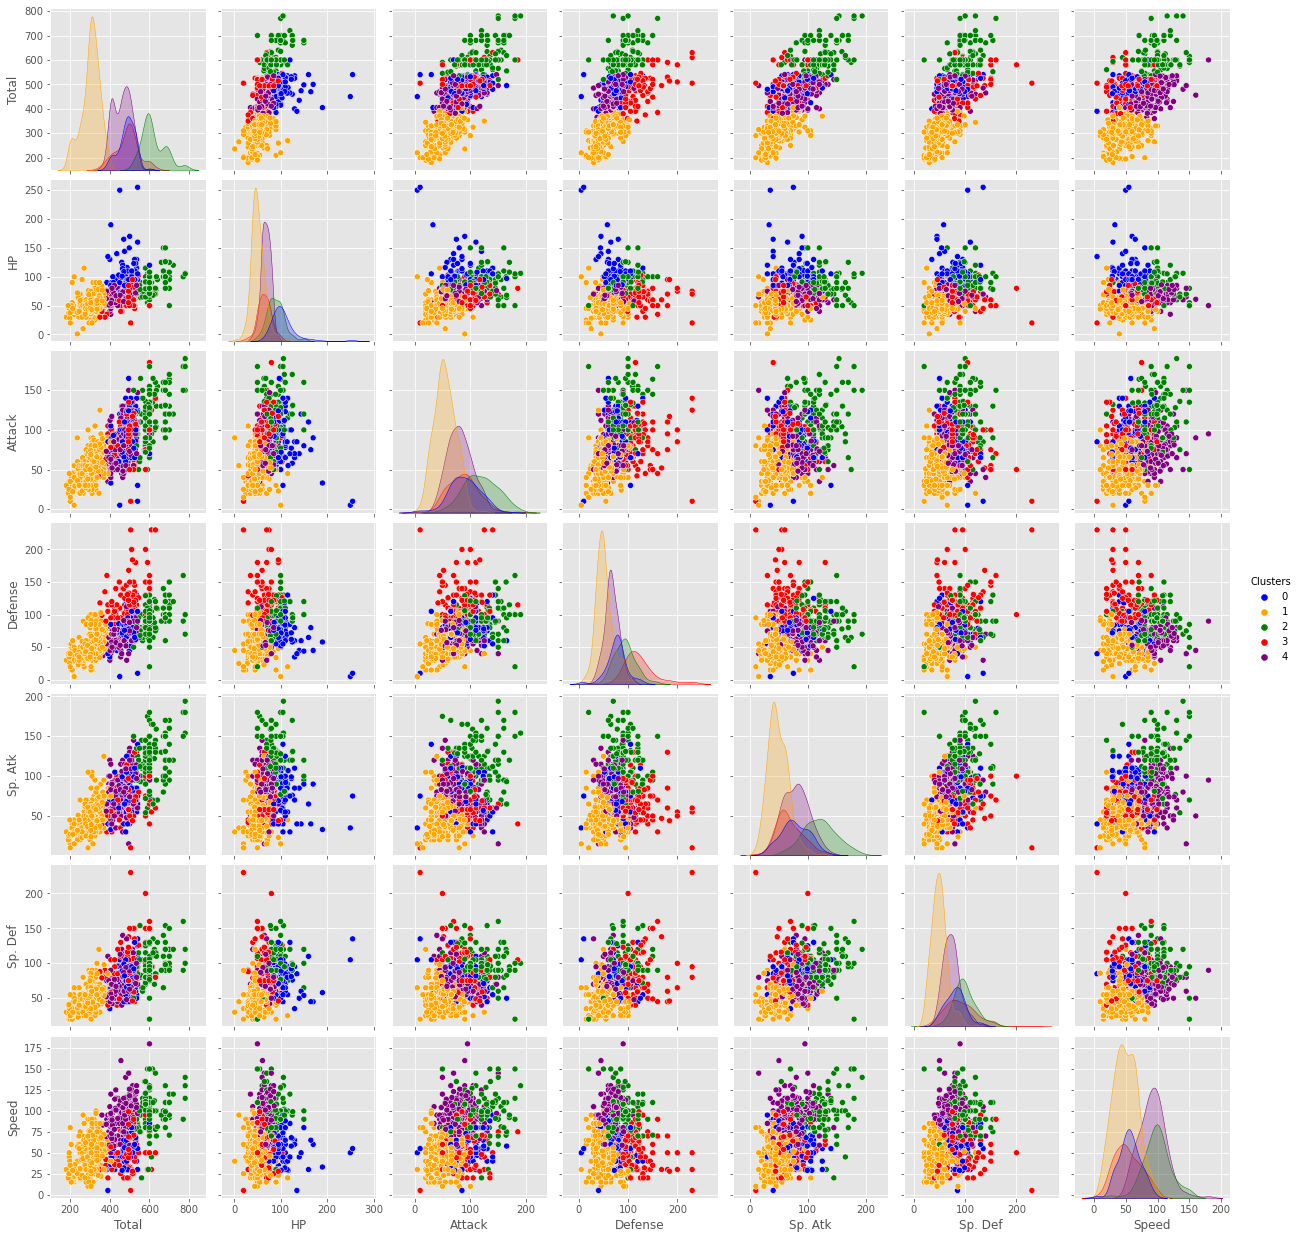

In [16]:
sns.pairplot(df[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', "Clusters"]],
             hue = "Clusters",
             palette ={0:'blue',
                      1:'orange',
                      2:'green',
                      3:'red',
                      4:'purple'})

クラスター2がほぼすべてのスキルが高い最強クラスタ  
逆にクラスター1は最弱クラスタかな？

▼クラスタごとに各スキルの数値をみてみる

In [17]:
df_group = df.groupby(["Clusters"]).agg({'HP': 'median', 
                              'Attack': 'median', 
                              'Defense': 'median', 
                              'Sp. Atk': 'median', 
                              'Sp. Def': 'median', 
                              'Speed': 'median'})
df_group

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Clusters,,,,,,
0,100.0,90.0,76.0,75.0,80.0,55.0
1,50.0,53.0,50.0,45.0,49.5,50.0
2,90.0,120.0,90.0,120.0,95.5,100.0
3,65.0,85.0,115.0,60.0,85.0,50.0
4,69.0,80.0,65.0,80.0,70.0,91.0


In [18]:
df_group['Skills mean'] = df_group.mean(1,6)
df_group

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Skills mean
Clusters,,,,,,,
0,100.0,90.0,76.0,75.0,80.0,55.0,79.333333
1,50.0,53.0,50.0,45.0,49.5,50.0,49.583333
2,90.0,120.0,90.0,120.0,95.5,100.0,102.583333
3,65.0,85.0,115.0,60.0,85.0,50.0,76.666667
4,69.0,80.0,65.0,80.0,70.0,91.0,75.833333


▼各クラスタのid詳細をみる

In [19]:
df_group_sort = df.groupby(["Clusters"])
df_group_sort.get_group(0)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Clusters
36,31,Nidoqueen,Poison,Ground,505,90,92,87,75,85,76,1,False,0
41,36,Clefable,Fairy,NaN,483,95,70,73,95,90,60,1,False,0
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False,0
50,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False,0
67,62,Poliwrath,Water,Fighting,510,90,95,95,70,90,70,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,683,Aromatisse,Fairy,NaN,462,101,72,72,99,89,29,6,False,0
757,687,Malamar,Dark,Psychic,482,86,92,88,68,75,73,6,False,0
769,699,Aurorus,Rock,Ice,521,123,77,72,99,92,58,6,False,0
770,700,Sylveon,Fairy,NaN,525,95,65,65,110,130,60,6,False,0


クラスタ0:HP特化グループ （例）ニドクイン、ピクシー、プクリン、ラッキーなど

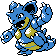

In [20]:
filename_031 = ("./data/031_kin.png")
im_031 = Image.open(filename_031)
im_031

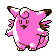

In [21]:
filename_036 = ("./data/036_kin.png")
im_036 = Image.open(filename_036)
im_036

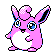

In [22]:
filename_040 = ("./data/040_kin.png")
im_040 = Image.open(filename_040)
im_040

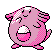

In [23]:
filename_113 = ("./data/113_kin.png")
im_113 = Image.open(filename_113)
im_113

In [24]:
df_group_sort.get_group(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Clusters
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,1
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,1
14,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,710,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,56,6,False,1
782,710,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False,1
783,710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False,1
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False,1


クラスタ1 : 最弱グループ  （例）フシギダネ、ヒトカゲ、ゼニガメ、キャタピー、トランセルなど

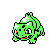

In [25]:
filename_001 = ("./data/001_kin.png")
im_001 = Image.open(filename_001)
im_001

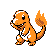

In [26]:
filename_004 = ("./data/004_kin.png")
im_004 = Image.open(filename_004)
im_004

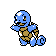

In [27]:
filename_007 = ("./data/007_kin.png")
im_007 = Image.open(filename_007)
im_007

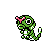

In [28]:
filename_010 = ("./data/010_kin.png")
im_010 = Image.open(filename_010)
im_010

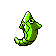

In [29]:
filename_011 = ("./data/011_kin.png")
im_011 = Image.open(filename_011)
im_011

In [30]:
df_group_sort.get_group(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Clusters
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,2
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,2
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,2
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False,2
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,2
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,2
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,2
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,2


クラスタ2:最強グループ　（例）メガフシギバナ、メガリザードンX(Y)、メガミュウツーYなど

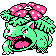

In [31]:
filename_003 = ("./data/003_gin.png")
im_003 = Image.open(filename_003)
im_003

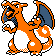

In [32]:
filename_006 = ("./data/006_gin.png")
im_006 = Image.open(filename_006)
im_006

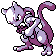

In [33]:
filename_150 = ("./data/150_gin.png")
im_150 = Image.open(filename_150)
im_150

In [34]:
df_group_sort.get_group(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Clusters
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,3
33,28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,1,False,3
52,47,Parasect,Bug,Grass,405,60,95,80,60,80,30,1,False,3
81,75,Graveler,Rock,Ground,390,55,95,115,45,45,35,1,False,3
82,76,Golem,Rock,Ground,495,80,120,130,55,65,45,1,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False,3
786,711,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False,3
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False,3
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False,3


クラスタ3:防御特化グループ （例）カメックス、サンドパン、パラセクト、ゴローニャ、ハガネールなど

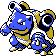

In [35]:
filename_009 = ("./data/009_kin.png")
im_009 = Image.open(filename_009)
im_009

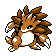

In [36]:
filename_028 = ("./data/028_kin.png")
im_028 = Image.open(filename_028)
im_028

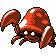

In [37]:
filename_047 = ("./data/047_kin.png")
im_047 = Image.open(filename_047)
im_047

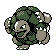

In [38]:
filename_076 = ("./data/076_kin.png")
im_076 = Image.open(filename_076)
im_076

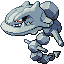

In [39]:
filename_208 = ("./data/208_rs.png")
im_208 = Image.open(filename_208)
im_208

In [40]:
df_group_sort.get_group(4).sort_values('HP')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Clusters
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False,4
69,64,Kadabra,Psychic,NaN,400,40,35,30,120,70,105,1,False,4
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,4
258,239,Elekid,Electric,NaN,360,45,63,37,65,55,95,2,False,4
259,240,Magby,Fire,NaN,365,45,75,37,70,55,83,2,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,469,Yanmega,Bug,Flying,515,86,76,86,116,56,95,4,False,4
736,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False,4
298,275,Shiftry,Grass,Dark,480,90,100,60,90,60,80,3,False,4
260,241,Miltank,Normal,NaN,490,95,80,105,40,70,100,2,False,4


クラスタ4:スピード特化グループ （例）スピアー、ダグドリオ、ユンゲラーなど

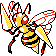

In [41]:
filename_015 = ("./data/015_kin.png")
im_015 = Image.open(filename_015)
im_015

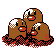

In [42]:
filename_051 = ("./data/051_kin.png")
im_051 = Image.open(filename_051)
im_051

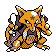

In [43]:
filename_064 = ("./data/064_kin.png")
im_064 = Image.open(filename_064)
im_064